In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

In [2]:
pyng_data = load_penguins()

In [3]:
pyng_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Exploratory Data Analysis

In [4]:
#How many species are there?
print(set(pyng_data['species']))

{'Gentoo', 'Adelie', 'Chinstrap'}


<AxesSubplot:>

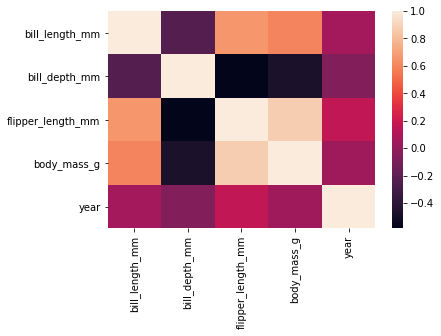

In [5]:
#Correlation heatmap of all the factors
sns.heatmap(pyng_data.corr())

<AxesSubplot:>

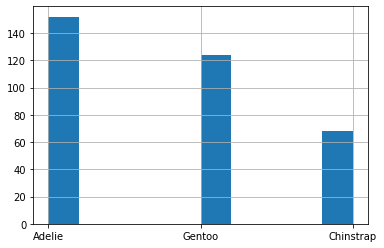

In [74]:
pyng_data['species'].hist()

# Data Preprocessing

In [6]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

clean_data = pyng_data.dropna()
clean_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [7]:
X = clean_data.iloc[:,1:]
y = clean_data.iloc[:,0]

In [175]:
scaler_x = StandardScaler()
sc_train_X = X
sc_train_X[['bill_length_mm',
            'bill_depth_mm',
            'flipper_length_mm',
            'body_mass_g']] = scaler_x.fit_transform(sc_train_X[['bill_length_mm',
                                      'bill_depth_mm',
                                      'flipper_length_mm',
                                      'body_mass_g']])

In [155]:
scaler_x

StandardScaler()

In [10]:
sc_train_X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,male,2007
1,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,female,2007
2,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,female,2007
4,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,female,2007
5,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,male,2007
...,...,...,...,...,...,...,...
339,Dream,2.162314,1.340165,0.431094,-0.257532,male,2009
340,Dream,-0.090248,0.475587,0.073816,-1.003795,female,2009
341,Dream,1.026876,0.526444,-0.569284,-0.537380,male,2009
342,Dream,1.246638,0.933305,0.645461,-0.133155,male,2009


In [176]:
encoder = OneHotEncoder(handle_unknown='ignore')
train_X = encoder.fit_transform(sc_train_X)

In [96]:
X_test

<333x397 sparse matrix of type '<class 'numpy.float64'>'
	with 2331 stored elements in Compressed Sparse Row format>

In [14]:
labeler = preprocessing.LabelEncoder()
train_Y = labeler.fit_transform(y)

In [41]:
train_Y = y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25)

In [120]:
X_train

<249x397 sparse matrix of type '<class 'numpy.float64'>'
	with 1743 stored elements in Compressed Sparse Row format>

In [121]:
X_test

<84x397 sparse matrix of type '<class 'numpy.float64'>'
	with 588 stored elements in Compressed Sparse Row format>

# Model Training

In [78]:
#Throw-At-The-Wall Model
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(n_estimators=30)
regr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [44]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


# Hyperparameter Tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [46]:
#Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               n_jobs = -1)

In [48]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

# Model Evaluation and Results

In [51]:
from sklearn.metrics import accuracy_score

In [79]:
y_predict = regr.predict(X_test)

In [80]:
errors1 = accuracy_score(y_test, y_predict)

In [81]:
print(errors1)

0.8214285714285714


In [83]:
best_random = rf_random.best_estimator_

In [84]:
y_predict = best_random.predict(X_test)
errors2 = accuracy_score(y_test, y_predict)
print(errors2)

0.8095238095238095


In [88]:
improvement = ((errors2 - errors1)/errors1)*100

In [89]:
improvement

#At first, maybe accuracy has gone down

-1.4492753623188355

In [90]:
#Let's compare classification reports
from sklearn.metrics import classification_report

#Simple classifier
y_predict = regr.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Adelie       0.90      0.59      0.72        32
   Chinstrap       0.64      0.88      0.74        16
      Gentoo       0.88      1.00      0.94        36

    accuracy                           0.82        84
   macro avg       0.81      0.82      0.80        84
weighted avg       0.84      0.82      0.81        84



In [91]:
#Best classifier
y_predict = best_random.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Adelie       0.90      0.56      0.69        32
   Chinstrap       0.61      0.88      0.72        16
      Gentoo       0.88      1.00      0.94        36

    accuracy                           0.81        84
   macro avg       0.80      0.81      0.78        84
weighted avg       0.84      0.81      0.80        84



In [ ]:
#The overall performance of both the 'simple' and 'complex' classifiers is pretty much the same.

#In a real world application, the difference between these two translates to space, time, and memory. To mirror the decisions made in that platform, we will pick the 'simpler' classifier

In [92]:
#Export best_random regressor
import pickle
filename = 'pyngit.sav'
pickle.dump(regr, open(filename, 'wb'))

In [139]:
#Exporting encoders for the x 
from joblib import dump, load
dump(scaler_x, 'scale_encoder.joblib') # save the model

['scale_encoder.joblib']

In [189]:
#Exporting encoders for the x 
from joblib import dump, load
dump(encoder, 'oneHot_encoder.joblib') # save the model

['oneHot_encoder.joblib']

In [93]:
#Opening model and trying results
import pickle
textPyng = pickle.load(open('pyngit.sav', 'rb'))

In [140]:
inputEncoder = load('scale_encoder.joblib') # load and reuse the model

In [143]:
finalEncoder = load('oneHot_encoder.joblib') # load and reuse the model

In [95]:
(textPyng.predict(X_test))

array(['Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',

In [159]:
#input that comes in from user
input_test = [['Torgersen',39.1,18.7,181.0,3750.0,'male',2007]]

In [180]:
input_test = [['Dream',34.5,19.1,175.0,3460.0,'female',2008]]

In [181]:
input_df = pd.DataFrame(input_test, columns=['island','bill_length_mm',
                                       'bill_depth_mm','flipper_length_mm',
                                       'body_mass_g','sex','year'])

In [183]:
input_df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Dream,34.5,19.1,175.0,3460.0,female,2008


In [184]:
sc_train_X = input_df
sc_train_X[['bill_length_mm',
            'bill_depth_mm',
            'flipper_length_mm',
            'body_mass_g']] = inputEncoder.transform(sc_train_X[['bill_length_mm',
                                      'bill_depth_mm',
                                      'flipper_length_mm',
                                      'body_mass_g']])

In [185]:
sc_train_X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Dream,-1.738463,0.984162,-1.855485,-0.929169,female,2008


In [186]:
train_X = encoder.transform(sc_train_X)

In [187]:
train_X

<1x397 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [188]:
textPyng.predict(train_X)

array(['Chinstrap'], dtype=object)